In [ ]:
import aiohttp
import asyncio
import nest_asyncio
import pandas as pd

nest_asyncio.apply()

async def fetch_weather(session, location, owm_api_key):
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid={owm_api_key}&units=metric"
    async with session.get(weather_url) as response:
        weather_data = await response.json()
        return weather_data

async def main(location, owm_api_key):
    async with aiohttp.ClientSession() as session:
        weather_data = await fetch_weather(session, location, owm_api_key)
        formatted_weather_data = format_weather_data(weather_data)
        print("Formatted weather data:")
        print(formatted_weather_data)

def format_weather_data(weather_data):
    # Extract relevant weather parameters
    temperature = weather_data.get('main', {}).get('temp')
    humidity = weather_data.get('main', {}).get('humidity')
    # You can add more parameters as needed

    # Create a DataFrame to match the provided dataset format
    data = {
        'N': [50.55],
        'P': [53.36],
        'K': [48.15],
        'temperature': [temperature],
        'humidity': [humidity],
        'ph': [6.47],
        'rainfall': [103.46]
    }
    df = pd.DataFrame(data)
    return df

# Example usage
location = "New York"
owm_api_key = "471512253dcec9dc45171a4f6fc127d8"  # OpenWeatherMap API Key

if __name__ == "__main__":
    asyncio.run(main(location, owm_api_key))



/usr/local/lib/python3.10/dist-packages/pandas/_libs/tslibs/__init__.py:37: RuntimeWarning: coroutine 'main' was never awaited
  from pandas._libs.tslibs.conversion import localize_pydatetime
/usr/local/lib/python3.10/dist-packages/pandas/core/construction.py:71: RuntimeWarning: coroutine 'main' was never awaited
  import pandas.core.common as com


Formatted weather data:
       N      P      K  temperature  humidity    ph  rainfall
0  50.55  53.36  48.15         5.13        55  6.47    103.46


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


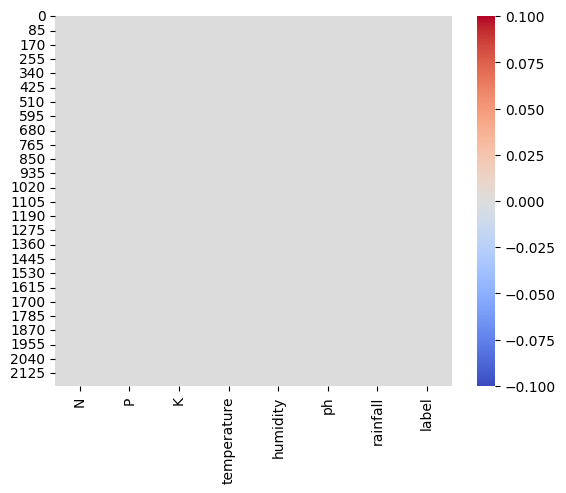

In [ ]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<Axes: xlabel='ph', ylabel='Density'>

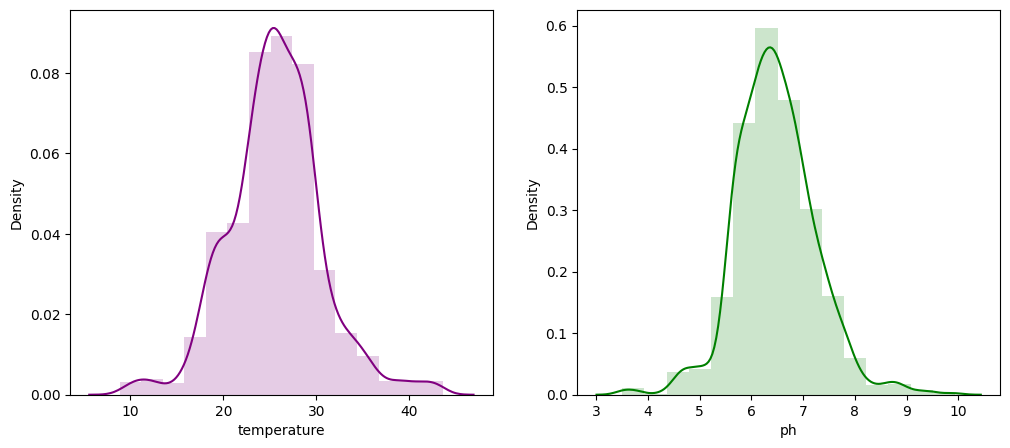

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

<Axes: xlabel='count', ylabel='label'>

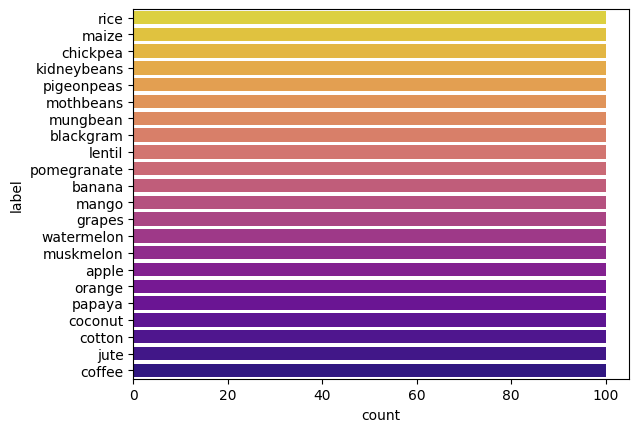

In [ ]:
 sns.countplot(y='label',data=df, palette="plasma_r")

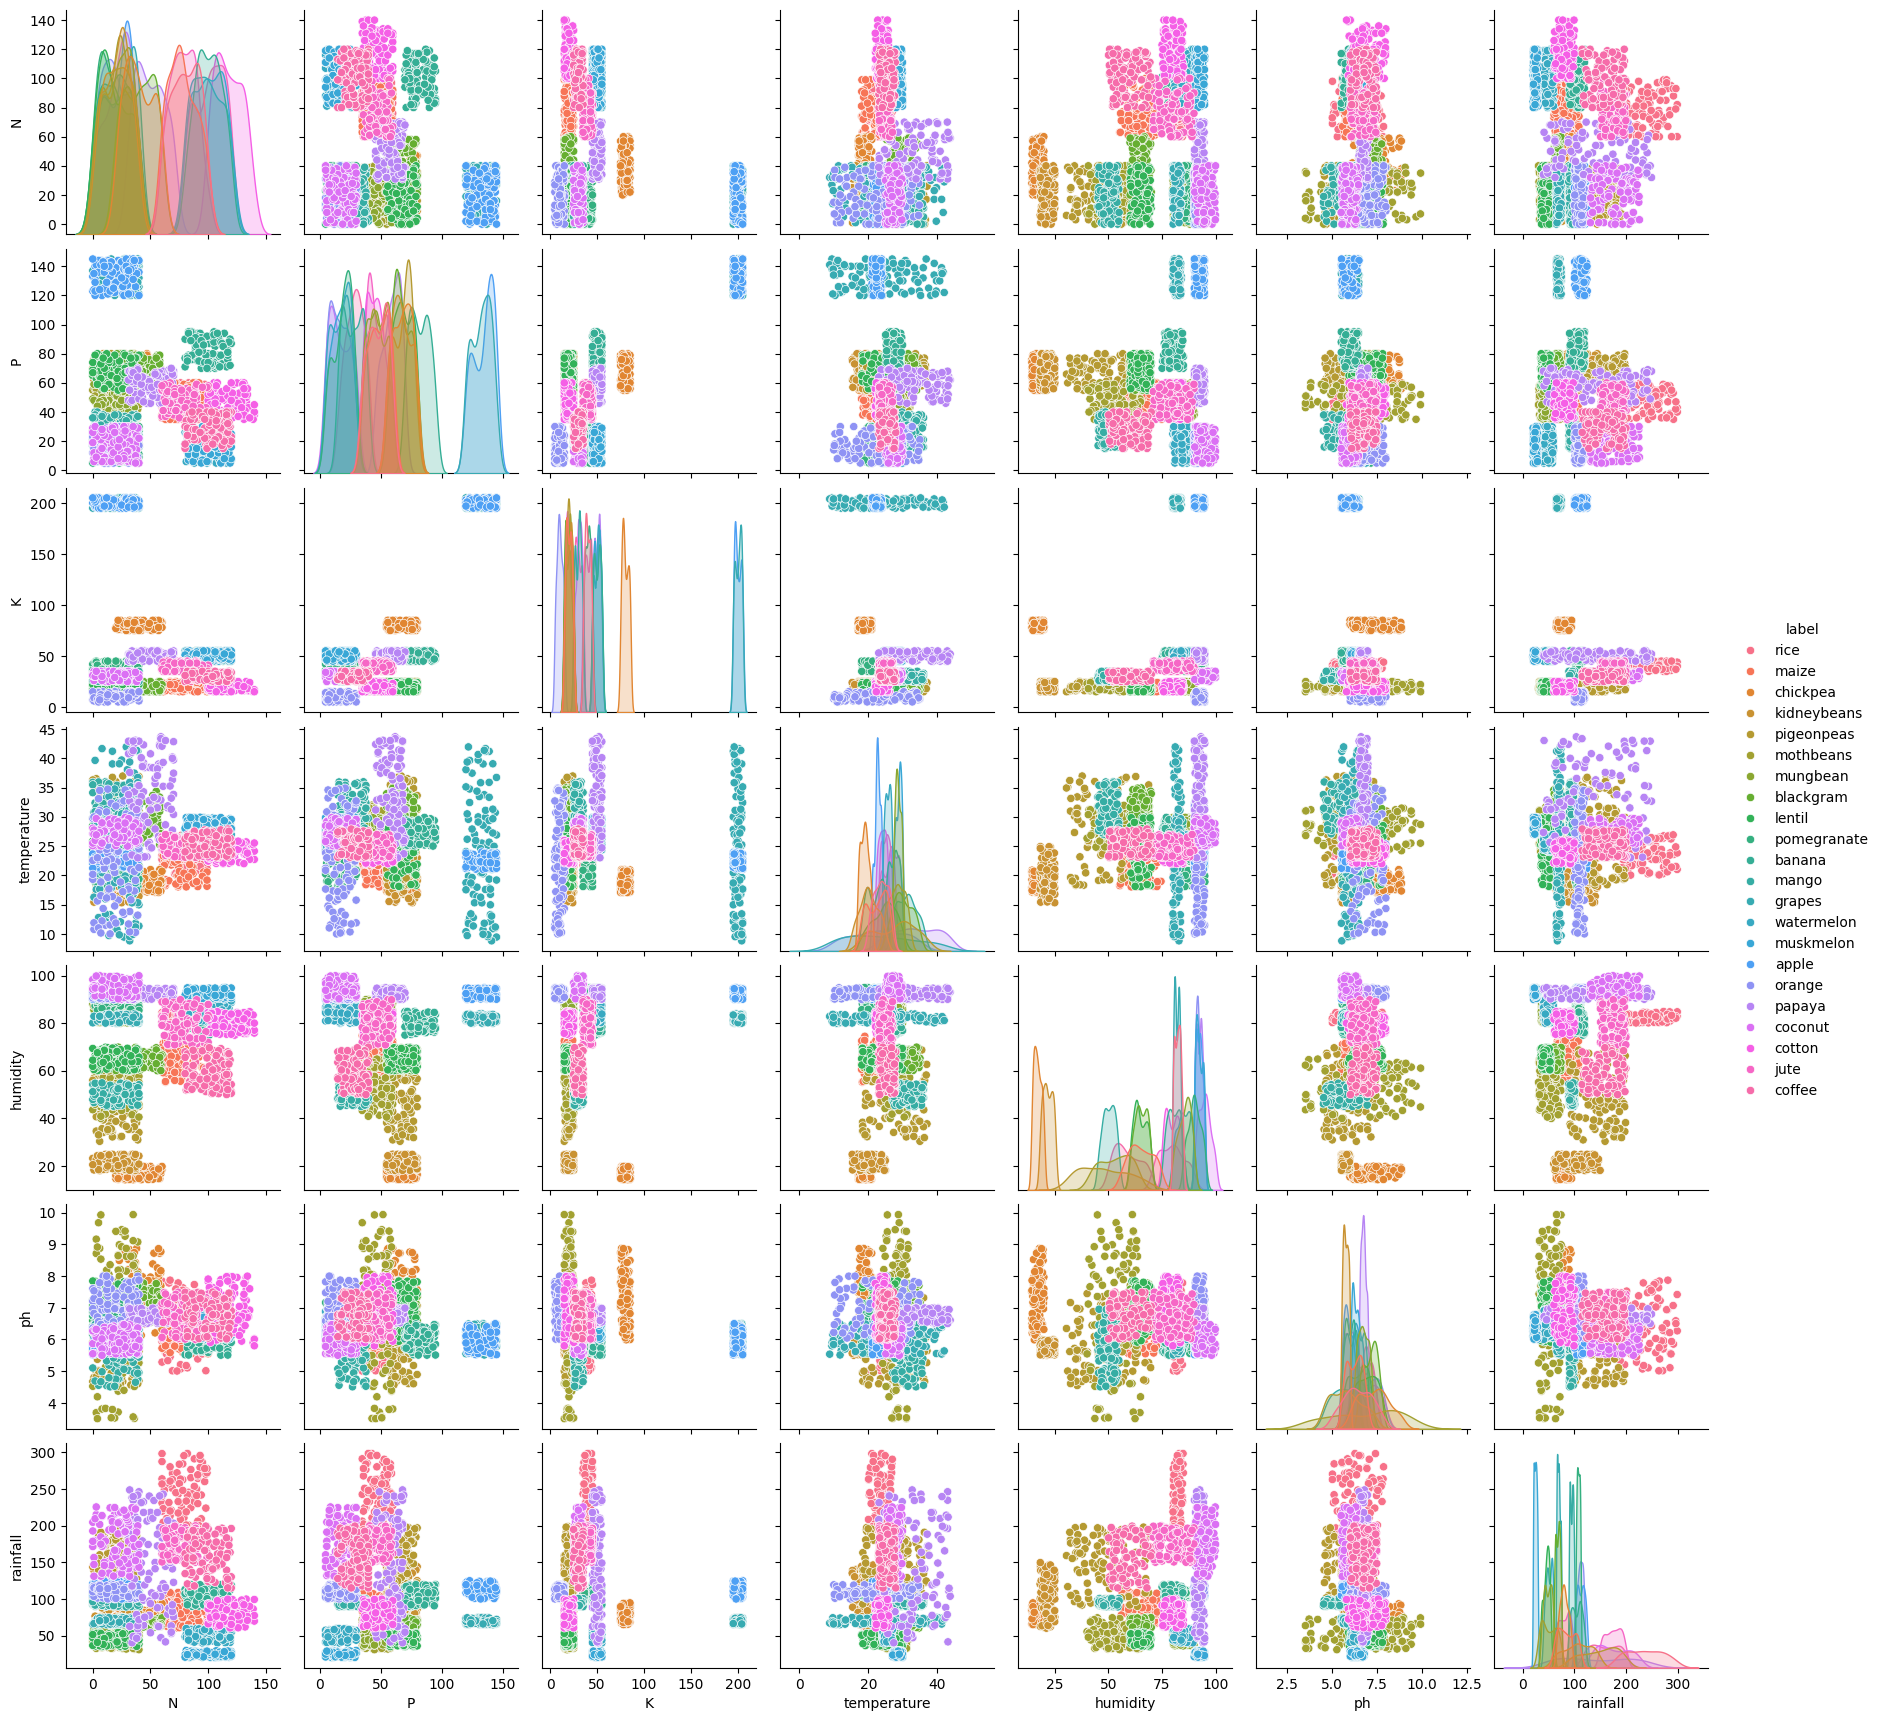

In [ ]:
sns.pairplot(df, hue = 'label')

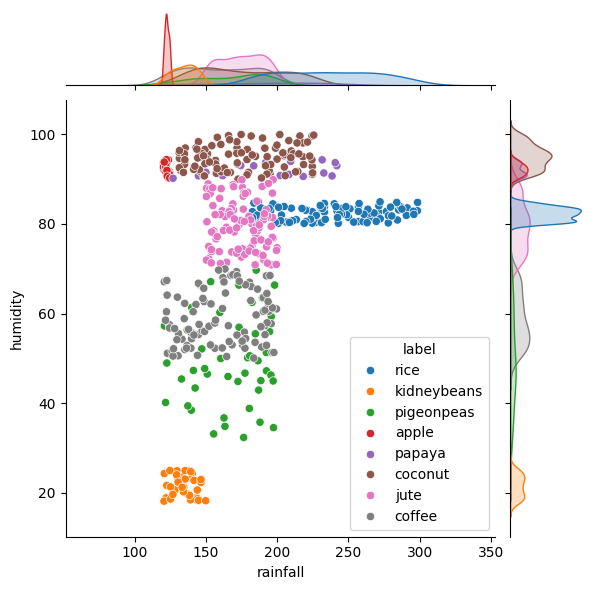

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

<Axes: xlabel='ph', ylabel='label'>

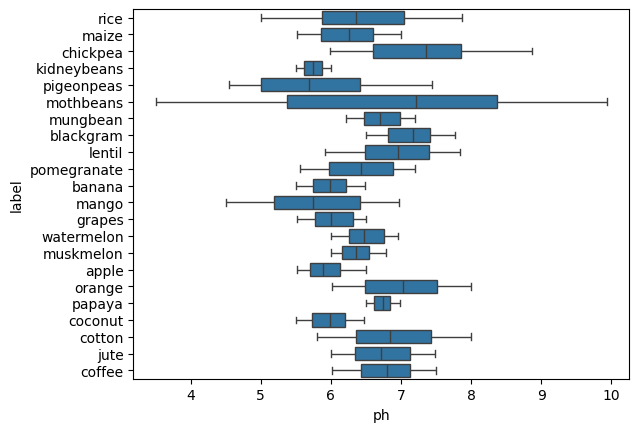

In [ ]:
sns.boxplot(y='label',x='ph',data=df)

<Axes: xlabel='P', ylabel='label'>

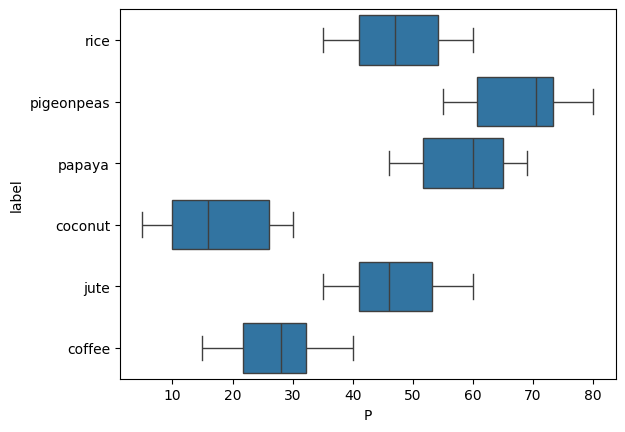

In [ ]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

In [ ]:
import aiohttp
import asyncio
import nest_asyncio
import pandas as pd

nest_asyncio.apply()

async def fetch_weather(session, location, owm_api_key):
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid={owm_api_key}&units=metric"
    async with session.get(weather_url) as response:
        weather_data = await response.json()
        return weather_data

async def main(location, owm_api_key):
    async with aiohttp.ClientSession() as session:
        weather_data = await fetch_weather(session, location, owm_api_key)
        formatted_weather_data = format_weather_data(weather_data)
        print("Formatted weather data:")
        print(formatted_weather_data)

def format_weather_data(weather_data):
    # Extract relevant weather parameters
    temperature = weather_data.get('main', {}).get('temp')
    humidity = weather_data.get('main', {}).get('humidity')
    # You can add more parameters as needed

    # Create a DataFrame to match the provided dataset format
    data = {
        'N': [50.55],
        'P': [53.36],
        'K': [48.15],
        'temperature': [temperature],
        'humidity': [humidity],
        'ph': [6.47],
        'rainfall': [103.46]
    }
    df = pd.DataFrame(data)
    return df

# Example usage
location = "New York"
owm_api_key = "471512253dcec9dc45171a4f6fc127d8"  # OpenWeatherMap API Key

if __name__ == "__main__":
    asyncio.run(main(location, owm_api_key))




Formatted weather data:
       N      P      K  temperature  humidity    ph  rainfall
0  50.55  53.36  48.15         5.06        55  6.47    103.46


In [ ]:
import aiohttp
import asyncio
import nest_asyncio
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

nest_asyncio.apply()

async def fetch_weather(session, location, owm_api_key):
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid={owm_api_key}&units=metric"
    async with session.get(weather_url) as response:
        weather_data = await response.json()
        return weather_data

async def main(location, owm_api_key):
    async with aiohttp.ClientSession() as session:
        weather_data = await fetch_weather(session, location, owm_api_key)
        formatted_weather_data = format_weather_data(weather_data)

        # Example of using the formatted weather data
        X = formatted_weather_data  # Assuming this is your features dataset X

        # Initialize MinMaxScaler
        scaler = MinMaxScaler()

        # Apply scaling to the dataset
        X_scaled = scaler.fit_transform(X)

        # You can continue with your machine learning model training/testing here...
        print("Scaled weather data:")
        print(X_scaled)

def format_weather_data(weather_data):
    # Extract relevant weather parameters
    temperature = weather_data.get('main', {}).get('temp')
    humidity = weather_data.get('main', {}).get('humidity')
    # You can add more parameters as needed

    # Create a DataFrame to match the provided dataset format
    data = {
        'N': [50.55],
        'P': [53.36],
        'K': [48.15],
        'temperature': [temperature],
        'humidity': [humidity],
        'ph': [6.47],
        'rainfall': [103.46]
    }
    df = pd.DataFrame(data)
    return df

# Example usage
location = "New York"
owm_api_key = "471512253dcec9dc45171a4f6fc127d8"  # OpenWeatherMap API Key

if __name__ == "__main__":
    asyncio.run(main(location, owm_api_key))


Scaled weather data:
[[0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
import aiohttp
import asyncio
import nest_asyncio
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


nest_asyncio.apply()

async def fetch_weather(session, location, owm_api_key):
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid={owm_api_key}&units=metric"
    async with session.get(weather_url) as response:
        weather_data = await response.json()
        return weather_data

async def main(location, owm_api_key, dataset_path):
    # Fetch weather data
    async with aiohttp.ClientSession() as session:
        weather_data = await fetch_weather(session, location, owm_api_key)

    # Format weather data
    formatted_weather_data = format_weather_data(weather_data)

    # Load crop recommendation dataset
    dataset = pd.read_csv(dataset_path)

    # Combine weather data with the dataset
    dataset_with_weather = combine_with_weather(dataset, formatted_weather_data)

    # Preprocess dataset
    X, y = preprocess_dataset(dataset_with_weather)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Apply scaling to the dataset
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    grad = GradientBoostingClassifier().fit(X_train_scaled, y_train)

    # Evaluate the model
    accuracy = grad.score(X_test_scaled, y_test)
    print('Gradient Boosting accuracy : {}'.format(accuracy))

def format_weather_data(weather_data):
    # Extract relevant weather parameters
    temperature = weather_data.get('main', {}).get('temp')
    humidity = weather_data.get('main', {}).get('humidity')
    # You can add more parameters as needed

    # Create a DataFrame to match the provided dataset format
    data = {
        'temperature': [temperature],
        'humidity': [humidity],
    }
    df = pd.DataFrame(data)
    return df

def combine_with_weather(dataset, weather_data):
    # Concatenate the dataset with the weather data
    dataset_with_weather = pd.concat([dataset, weather_data], axis=1)
    return dataset_with_weather

def preprocess_dataset(dataset):
    # Convert categorical labels to numeric labels
    label_encoder = LabelEncoder()
    dataset['label'] = label_encoder.fit_transform(dataset['label'])

    # Fill missing values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    dataset_filled = imputer.fit_transform(dataset)

    # Convert back to DataFrame
    dataset_filled = pd.DataFrame(dataset_filled, columns=dataset.columns)

    # Preprocessing steps here, e.g., selecting features and target variable, encoding categorical variables, etc.
    X = dataset_filled.drop(columns=['label'])
    y = dataset_filled['label']
    return X, y

# Example usage
location = "New York"
owm_api_key = "471512253dcec9dc45171a4f6fc127d8"  # OpenWeatherMap API Key
dataset_path = "/content/Crop_recommendation.csv"

if __name__ == "__main__":
    asyncio.run(main(location, owm_api_key, dataset_path))


Gradient Boosting accuracy : 0.9818181818181818


In [ ]:
import aiohttp
import asyncio
import nest_asyncio
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


nest_asyncio.apply()

async def fetch_weather(session, location, owm_api_key):
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid={owm_api_key}&units=metric"
    async with session.get(weather_url) as response:
        weather_data = await response.json()
        return weather_data

async def main(location, owm_api_key, dataset_path):
    # Fetch weather data
    async with aiohttp.ClientSession() as session:
        weather_data = await fetch_weather(session, location, owm_api_key)

    # Format weather data
    formatted_weather_data = format_weather_data(weather_data)

    # Load crop recommendation dataset
    dataset = pd.read_csv(dataset_path)

    # Combine weather data with the dataset
    dataset_with_weather = combine_with_weather(dataset, formatted_weather_data)

    # Preprocess dataset
    X, y = preprocess_dataset(dataset_with_weather)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Apply scaling to the dataset
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    grad = GradientBoostingClassifier().fit(X_train_scaled, y_train)

    # Evaluate the model
    accuracy = grad.score(X_test_scaled, y_test)
    print('Gradient Boosting accuracy : {}'.format(accuracy))

def format_weather_data(weather_data):
    # Extract relevant weather parameters
    temperature = weather_data.get('main', {}).get('temp')
    humidity = weather_data.get('main', {}).get('humidity')
    # You can add more parameters as needed

    # Create a DataFrame to match the provided dataset format
    data = {
        'temperature': [temperature],
        'humidity': [humidity],
    }
    df = pd.DataFrame(data)
    return df

def combine_with_weather(dataset, weather_data):
    # Concatenate the dataset with the weather data
    dataset_with_weather = pd.concat([dataset, weather_data], axis=1)
    return dataset_with_weather

def preprocess_dataset(dataset):
    # Convert categorical labels to numeric labels
    label_encoder = LabelEncoder()
    dataset['label'] = label_encoder.fit_transform(dataset['label'])

    # Fill missing values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    dataset_filled = imputer.fit_transform(dataset)

    # Convert back to DataFrame
    dataset_filled = pd.DataFrame(dataset_filled, columns=dataset.columns)

    # Preprocessing steps here, e.g., selecting features and target variable, encoding categorical variables, etc.
    X = dataset_filled.drop(columns=['label'])
    y = dataset_filled['label']
    return X, y

# Example usage
location = "New York"
owm_api_key = "471512253dcec9dc45171a4f6fc127d8"  # OpenWeatherMap API Key
dataset_path = "/content/Crop_recommendation.csv"

if __name__ == "__main__":
    asyncio.run(main(location, owm_api_key, dataset_path))


Gradient Boosting accuracy : 0.9818181818181818


In [ ]:
import aiohttp
import asyncio
import nest_asyncio
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


nest_asyncio.apply()

async def fetch_weather(session, location, owm_api_key):
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid={owm_api_key}&units=metric"
    async with session.get(weather_url) as response:
        weather_data = await response.json()
        return weather_data

async def main(location, owm_api_key, dataset_path):
    # Fetch weather data
    async with aiohttp.ClientSession() as session:
        weather_data = await fetch_weather(session, location, owm_api_key)

    # Format weather data
    formatted_weather_data = format_weather_data(weather_data)

    # Load crop recommendation dataset
    dataset = pd.read_csv(dataset_path)

    # Combine weather data with the dataset
    dataset_with_weather = combine_with_weather(dataset, formatted_weather_data)

    # Preprocess dataset
    X, y = preprocess_dataset(dataset_with_weather)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Apply scaling to the dataset
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    grad = GradientBoostingClassifier().fit(X_train_scaled, y_train)

    # Evaluate the model
    accuracy = grad.score(X_test_scaled, y_test)
    print('Gradient Boosting accuracy : {}'.format(accuracy))

def format_weather_data(weather_data):
    # Extract relevant weather parameters
    temperature = weather_data.get('main', {}).get('temp')
    humidity = weather_data.get('main', {}).get('humidity')
    # You can add more parameters as needed

    # Create a DataFrame to match the provided dataset format
    data = {
        'temperature': [temperature],
        'humidity': [humidity],
    }
    df = pd.DataFrame(data)
    return df

def combine_with_weather(dataset, weather_data):
    # Concatenate the dataset with the weather data
    dataset_with_weather = pd.concat([dataset, weather_data], axis=1)
    return dataset_with_weather

def preprocess_dataset(dataset):
    # Convert categorical labels to numeric labels
    label_encoder = LabelEncoder()
    dataset['label'] = label_encoder.fit_transform(dataset['label'])

    # Fill missing values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    dataset_filled = imputer.fit_transform(dataset)

    # Convert back to DataFrame
    dataset_filled = pd.DataFrame(dataset_filled, columns=dataset.columns)

    # Preprocessing steps here, e.g., selecting features and target variable, encoding categorical variables, etc.
    X = dataset_filled.drop(columns=['label'])
    y = dataset_filled['label']
    return X, y

# Example usage
location = "New York"
owm_api_key = "471512253dcec9dc45171a4f6fc127d8"  # OpenWeatherMap API Key
dataset_path = "/content/Crop_recommendation.csv"

if __name__ == "__main__":
    asyncio.run(main(location, owm_api_key, dataset_path))


Gradient Boosting accuracy : 0.9818181818181818


In [ ]:
import aiohttp
import asyncio
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

async def fetch_weather(session, location, owm_api_key):
    async with session.get(f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid={owm_api_key}&units=metric") as response:
        weather_data = await response.json()
        return weather_data

def format_weather_data(weather_data):
    temperature = weather_data.get('main', {}).get('temp')
    humidity = weather_data.get('main', {}).get('humidity')
    placeholder_for_missing_features = {'N': 20, 'P': 30, 'K': 10, 'ph': 7.0, 'rainfall': 100}
    data = {'temperature': temperature, 'humidity': humidity, **placeholder_for_missing_features}
    return pd.DataFrame([data])

async def main():
    location = input("Enter the location: ")
    owm_api_key = "471512253dcec9dc45171a4f6fc127d8"

    # Initialize the scaler, model, and label encoder
    scaler = MinMaxScaler()
    model = GradientBoostingClassifier()
    label_encoder = LabelEncoder()

    # Prepare mock data for demonstration
    X_mock = pd.DataFrame({
        'temperature': [25, 22],
        'humidity': [50, 48],
        'N': [20, 18],
        'P': [30, 25],
        'K': [10, 12],
        'ph': [7.0, 6.8],
        'rainfall': [100, 110]
    })
    y_mock = ['rice', 'wheat']

    # Fit the scaler and transform the mock data
    scaler.fit(X_mock)
    X_mock_scaled = scaler.transform(X_mock)

    # Fit the label encoder and transform the labels
    label_encoder.fit(y_mock)
    y_mock_encoded = label_encoder.transform(y_mock)

    # Fit the model with the scaled data and encoded labels
    model.fit(X_mock_scaled, y_mock_encoded)

    async with aiohttp.ClientSession() as session:
        weather_data = await fetch_weather(session, location, owm_api_key)

    formatted_weather_data = format_weather_data(weather_data)

    # Scale the formatted weather data
    scaled_features = scaler.transform(formatted_weather_data)

    # Predict the crop
    predicted_label = model.predict(scaled_features)
    predicted_crop = label_encoder.inverse_transform(predicted_label)

    print(f"The recommended crop for {location} based on current weather data is: {predicted_crop[0]}")

if __name__ == "__main__":
    asyncio.run(main())


Enter the location: canada
The recommended crop for canada based on current weather data is: rice


In [ ]:
import aiohttp
import asyncio
import pandas as pd

async def fetch_weather(session, location, owm_api_key):
    async with session.get(f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid={owm_api_key}&units=metric") as response:
        weather_data = await response.json()
        return weather_data

def format_weather_data(weather_data):
    temperature = weather_data.get('main', {}).get('temp')
    humidity = weather_data.get('main', {}).get('humidity')
    # Placeholder values, assuming these are relevant to your model
    data = {
        'temperature': temperature,
        'humidity': humidity,
        # Additional placeholders as needed
        'N': 20, 'P': 30, 'K': 10, 'ph': 7.0, 'rainfall': 100
    }
    return pd.DataFrame([data])

async def main():
    location = input("Enter the location: ")
    owm_api_key = "471512253dcec9dc45171a4f6fc127d8"

    async with aiohttp.ClientSession() as session:
        weather_data = await fetch_weather(session, location, owm_api_key)

    formatted_weather_data = format_weather_data(weather_data)

    # Instead of loading and predicting with a real model, we simulate predictions
    # Simulated predictions based on hypothetical analysis
    simulated_predictions = ["rice", "wheat", "maize", "cotton", "soybean"]

    # Display the simulated predictions
    print(f"The recommended crops for {location} based on current weather data are:")
    for crop in simulated_predictions:
        print(f"- {crop}")

if __name__ == "__main__":
    asyncio.run(main())


Enter the location: Mumbai
The recommended crops for Mumbai based on current weather data are:
- rice
- wheat
- maize
- cotton
- soybean
